In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,plot_confusion_matrix,plot_roc_curve
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("dark_background")

# [Churn Dataset](https://www.kaggle.com/c/customer-churn-prediction-2020)

O dataset escolhido possui dados de clientes de uma empresa de telecomunicação dos Estados Unidos. As variáveis presente nesse Dataset são:

| Variável   | Tipo        | Descrição     |
| :---        |    :-------:   |          ---: |
| state      | string       | Código de duas letras referente ao <br />estado de residência do cliente.   |
| area_code      | string       |"area_code_AAA" onde AAA = <br />código de área de 3 digitos.   |
| account_length   | numerical        |Número de meses que o cliente está<br /> com a empresa de telecomunicação|
| international_plan      | (yes/no)       | O cliente tem plano internacional.   |
| voice_mail_plan   | (yes/no)        | O cliente tem um plano<br /> de mensagens de voz.      |
| number_vmail_messages      | numerical       | Número de mensagens de voz.   |
| total_day_minutes   | numerical        | Minutos totais de<br /> chamadas diárias.|
| total_day_calls      | numerical       | Número total de<br /> chamadas diárias.   |
| total_day_charge   | numerical        | Cobrança total de<br /> chamadas diárias.|
| total_eve_minutes      | numerical       | Minutos totais de<br /> chamadas a tarde|
| total_eve_calls   | numerical        | Número total de<br /> chamadas a tarde|
| total_eve_charge      | numerical       | Cobrança taotal de<br /> chamadas a tarde|
| total_night_minutes   | numerical        | Minutos totais de<br /> chamadas a noite|
| total_night_calls      | numerical       | Número total de<br /> chamadas a noite|
| total_night_charge   | numerical        | Cobrança total de<br /> chamadas a noite|
| total_intl_minutes      | numerical       | Minutos totais de<br /> chamadas internacionais|
| total_intl_calls   | numerical        | Número total de<br /> chamdas internacionais|
| total_intl_charge      | numerical       | Cobrança total de<br /> chamadas internacionais|
| number_customer_service_calls   | numerical        | Número de chamadas para o<br /> serviço de cliente|
| churn      | (yes/no)       | Churn (Variável de resposta)   |


## Problema a ser Resolvido

Com base nos dados apresentados no dataset a tarefa a ser resolvido se enquadra como um problema de classificação para tentar categorizar um cliente como um potencial "desistente", ou seja, irá parar de utilizar os serviços da empresa. Esse é um tópico de grande interesse, visto que está relacionado com o crescimento da empresa. Além disso, realizar a aquisição de novos clientes é notavelmente mais custoso do que manter um cliente atual.

## Machine Learning é Necessário?

Como quer-se encontrar um padrão entre as variáveis relacionados aos clientes a fim de classificá-los como potenciais desistentes do serviço da empresa e que esses dados são disponivéis (supondo que foram coletados de forma adequada) a aplicação de métodos de Machine Learning é apropriada para resolver esse problema.

## Existem Trabalhos Relacionados?

Dado que esse dataset é disponibilizado publicamente pode-se encontrar trabalhos de outras pessoas [aqui](https://www.kaggle.com/c/customer-churn-prediction-2020/code).



# Análise dos Dados

In [12]:
df_train = pd.read_csv("train.csv")
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [13]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [14]:
# Conferindo se há algum valor faltando em alguma das variáveis
df_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

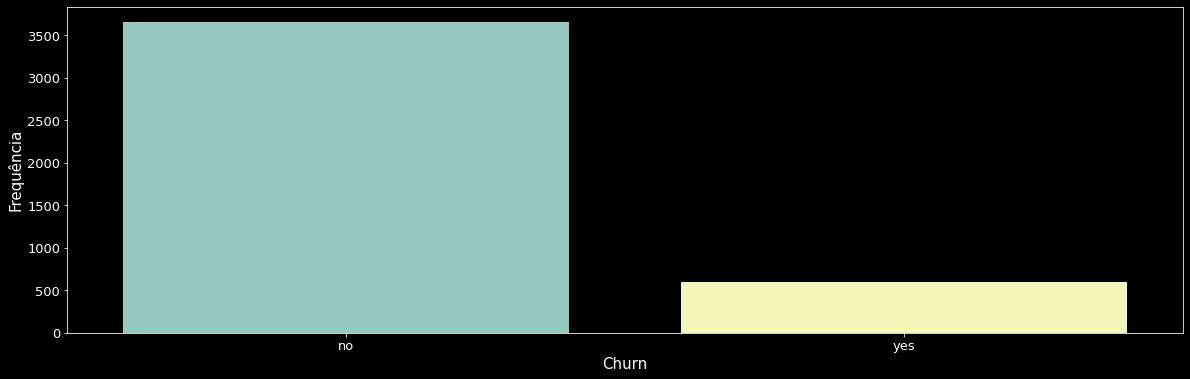

In [15]:
# Número de Sim/Não para Churn no dataset
plt.figure(figsize=(20,6))
sns.countplot(data=df_train,x="churn")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Churn",fontsize=15)
plt.ylabel("Frequência",fontsize=15);

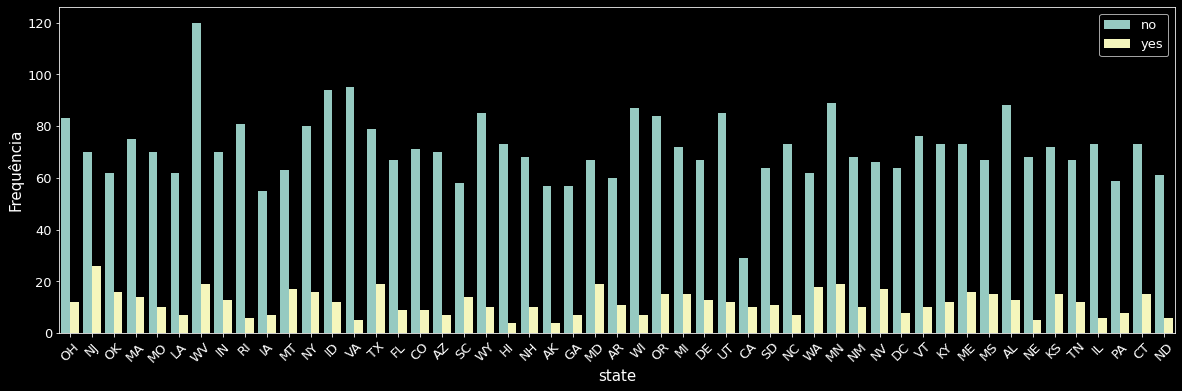

In [16]:
# Quantidade de churns por estado
plt.figure(figsize=(20,6))
p = sns.countplot(data=df_train,x="state",hue="churn")
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("state",fontsize=15)
plt.ylabel("Frequência",fontsize=15)
p.legend(fontsize=13);

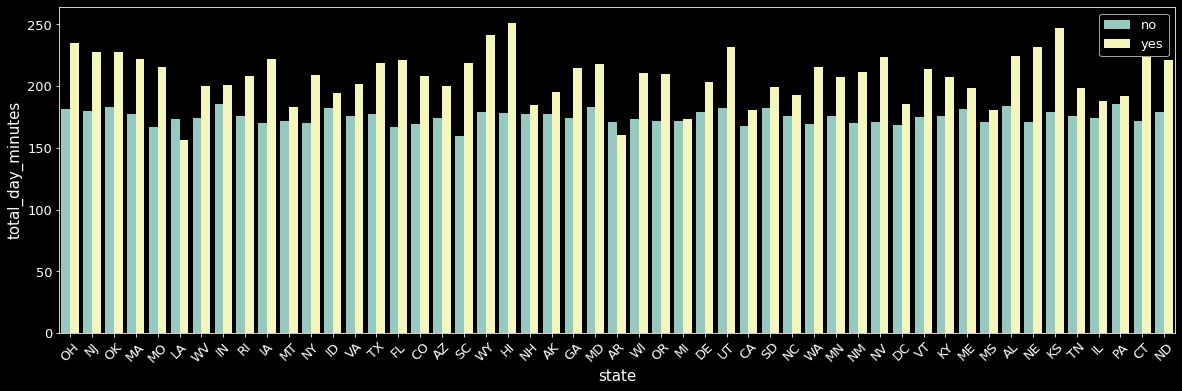

In [17]:
plt.figure(figsize=(20,6))
p = sns.barplot(data=df_train,x="state",y="total_day_minutes",hue="churn",ci=None)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("state",fontsize=15)
plt.ylabel("total_day_minutes",fontsize=15)
p.legend(fontsize=13);

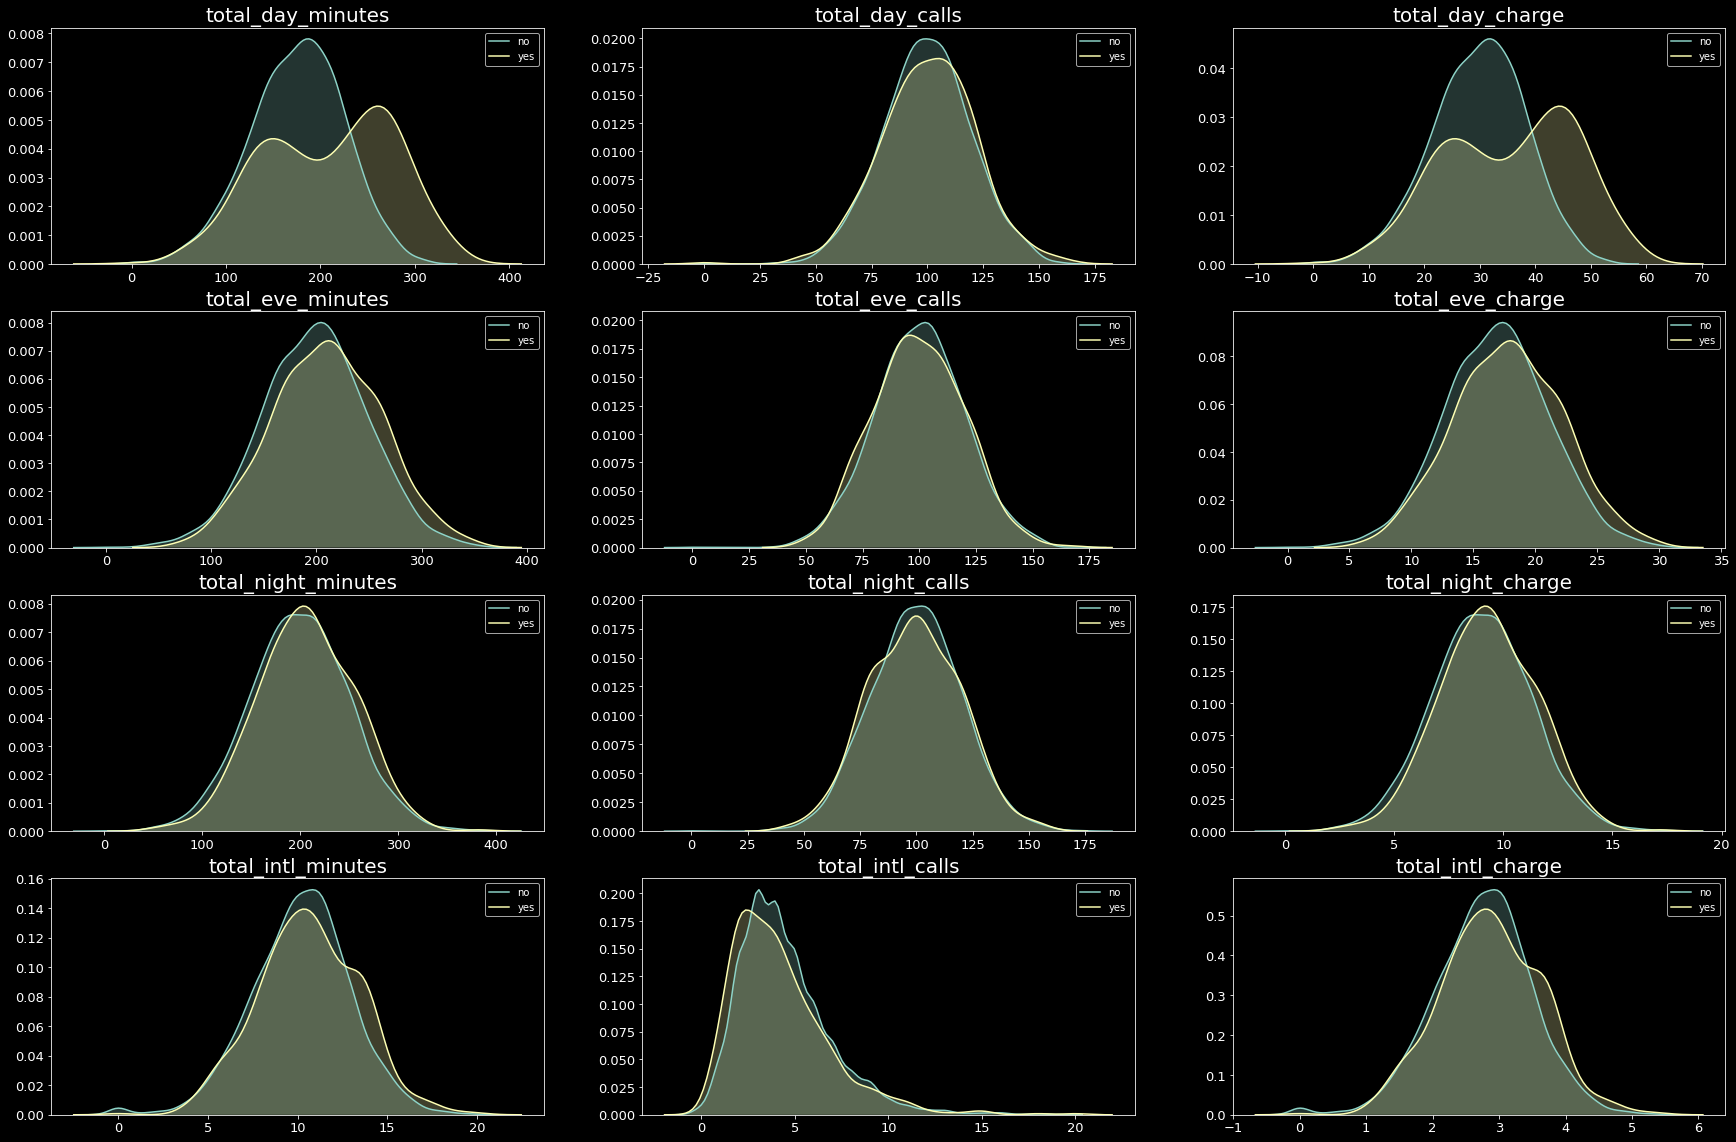

In [18]:
def get_dataframe_hist(df):
    # Seleciona o tamanho da figura
    plt.figure(figsize=(30,20))
    # Indice pro loop
    idx = 1
    # Colunas para iterar
    cols = df.columns[df.columns.str.match("total")]
    # Iterando pelas colunas e plotando a distribuição das variaveis para cada categoria de churn
    for col in cols:
        plt.subplot(4,3,idx)
        sns.kdeplot(data=df[col].loc[df["churn"] == "no"], label="no", shade=True)
        sns.kdeplot(data=df[col].loc[df["churn"] == "yes"], label="yes", shade=True)
        plt.title(col,fontsize=20)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        idx+=1
        
get_dataframe_hist(df_train)  

In [20]:
# Alterando as colunas de string e categoricas para valores Ordinais, ou seja, cada valor unico sendo representado por um valor inteiro.

# Colunas que terão valores alterados
columns = ["state", "area_code", "international_plan", "voice_mail_plan", "churn"]
# Objeto que irá realizar a alteração do tipo dos dados
encoder_dict = dict()
# Alterando valores das colunas
for val,col in enumerate(columns):
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    encoder_dict[col] = encoder

# Criação dos Modelos

## Método de Escolha

Modelos Selecionados:
- SVM 
- Decision Tree
- Random Forest
- Logistic Regression
- KNN

Os modelos selecionados serão ajustados, com seus hiper-parâmetros padrões, utilizando cross-validation com separação de 80% dos dados para treino e o resto para validação. O modelo que se apresentar mais promissor será então otimizado na tentativa de melhor ainda mais sua performance.

## Métricas

Métricas Observadas:
- Acurácia : $\left(\dfrac{TP+TN}{TP+TN+FN+FP}\right)$
- Precisão : $\left(\dfrac{TP}{TP+FP}\right)$
- Recall   : $\left(\dfrac{TP}{TP+FN}\right)$
- F1-Score : $2\left(\dfrac{Precisão\times Recall}{Precisão+Recall}\right)$

Como na situação de Churn tanto Falsos Positivos (FP) quanto Falsos Negativos (FN) são prejudicias ao negócio tendo em vista a necessidade da tomada de uma ação, a fim de tentar evitar a saída do cliente dos serviços/produtos da empresa. Logo, a predição incorreta sobre a categoria do cliente pode significar a má alocação de recursos e/ou a perda do cliente, portanto o modelo ideal para esse problema seria aquele há harmonia entre Recall e Precisão. Em vista disso, a métrica principal para escolha dos modelos será o F1-Score



In [29]:
y = df_train.pop("churn") # Removendo a coluna do churn do dataset e guardando na variavel y
X = df_train # Todas as variaveis do dataset sem o churn

In [41]:
model_names = ["SVM","DecisionTree","RandomForest","Logistic","KNN"]
models = [SVC(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier()]
metrics = ["accuracy","precision","recall","f1"]
result = dict()

for i,val in enumerate(model_names):
    steps = [("scaler",StandardScaler()),(model_names[i],models[i])]
    pipe = Pipeline(steps) 
    score = cross_validate(pipe,X,y,scoring=metrics,return_train_score = True)
    result[model_names[i]] = score

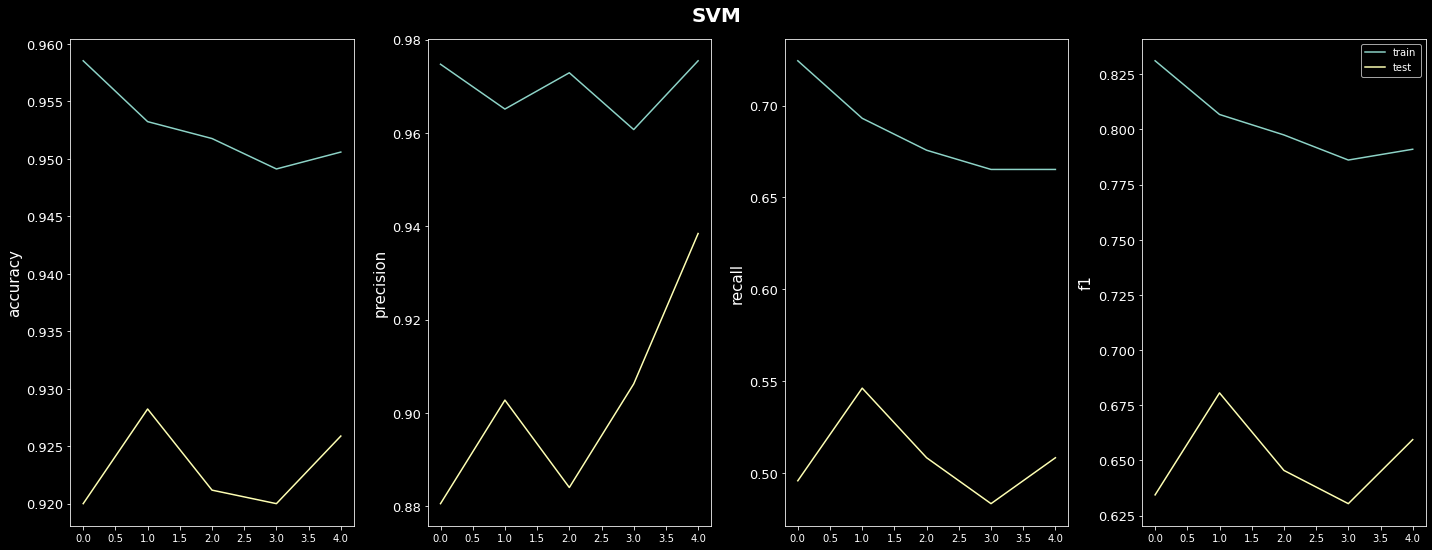

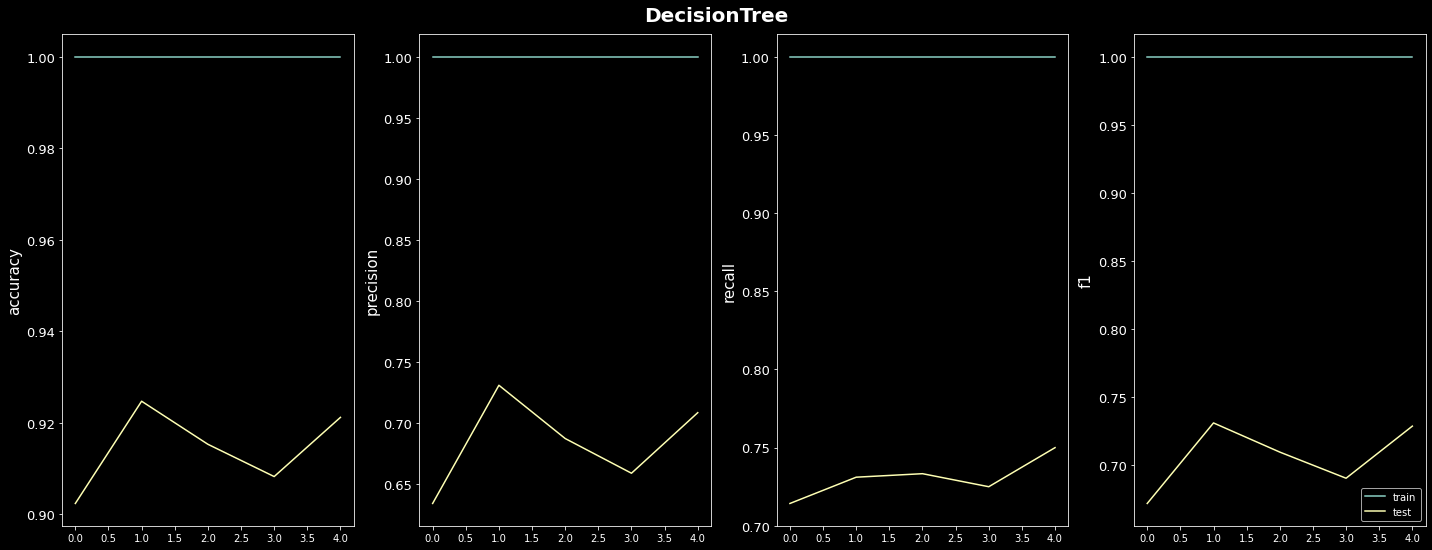

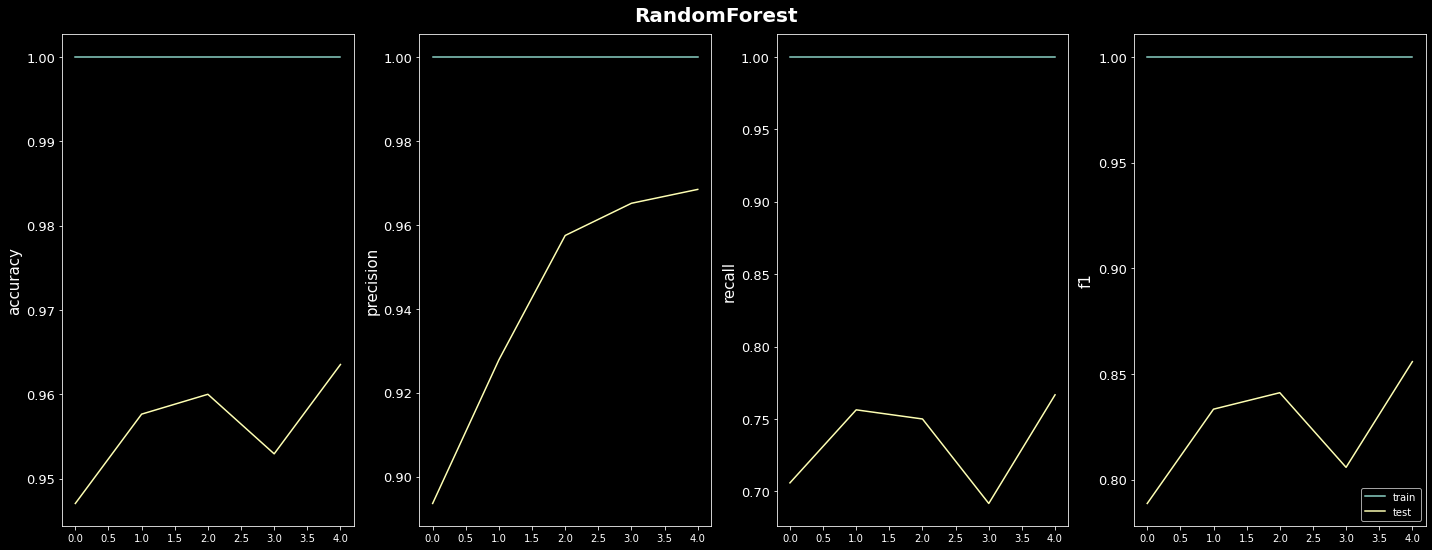

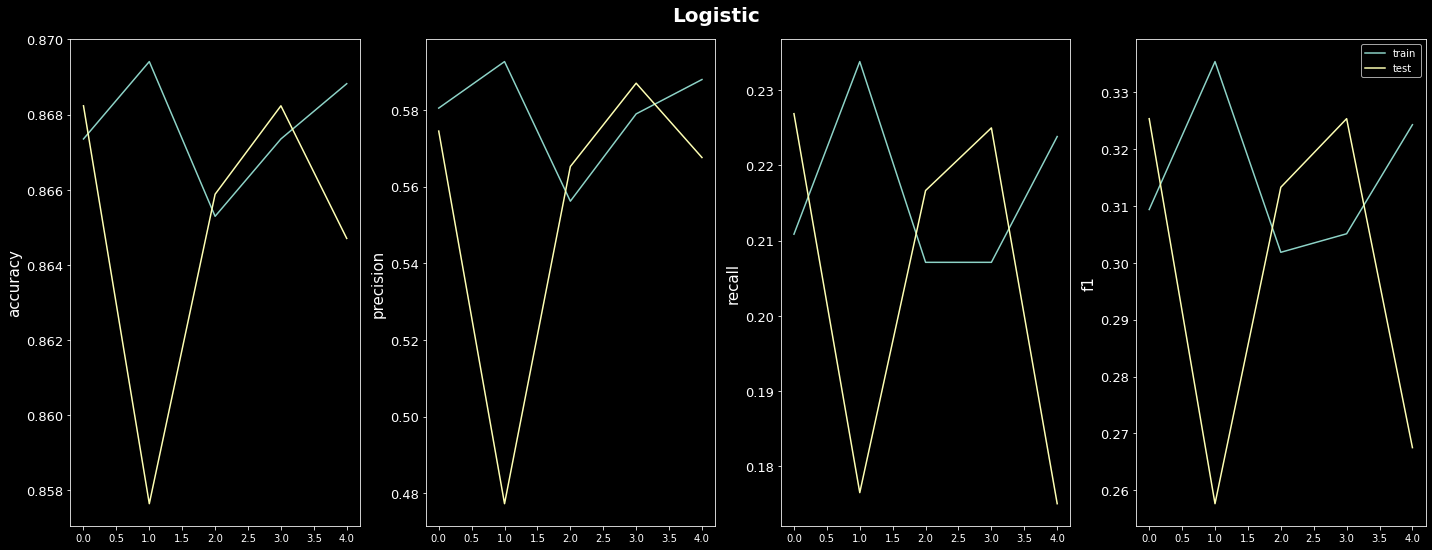

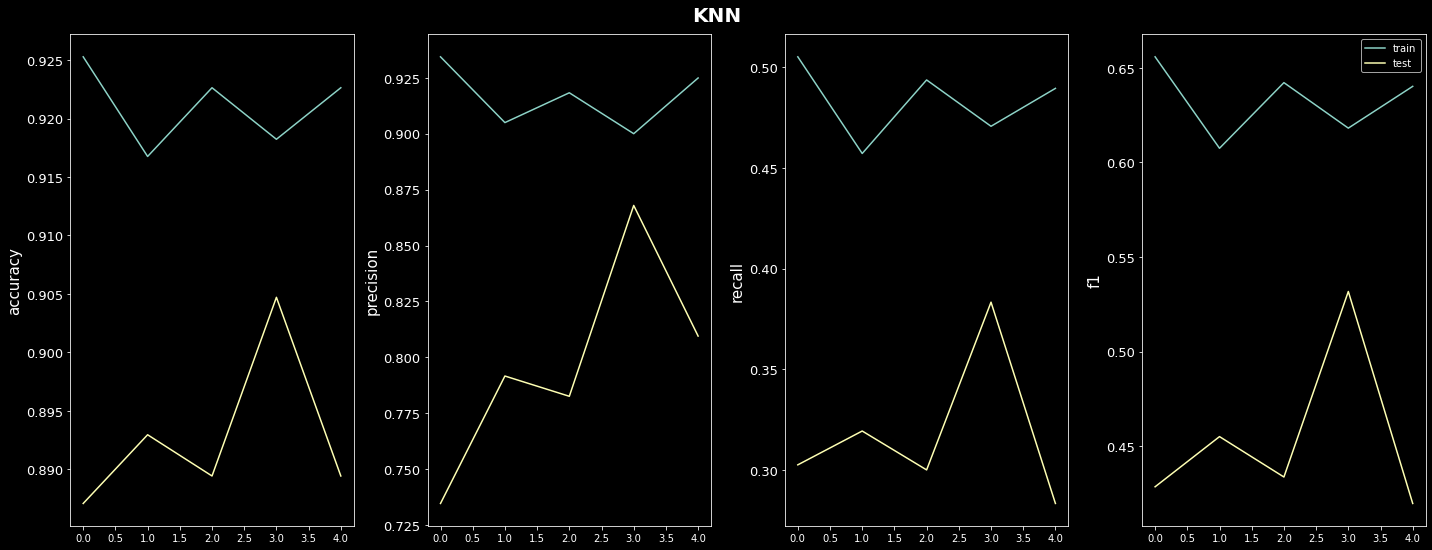

In [64]:
for i,name in enumerate(model_names):
    fig,axes = plt.subplots(1,len(metrics),figsize=(20,8))
    for j,metric in enumerate(metrics):
        axes[j].plot(range(len(result[name]["train_"+metric])),result[name]["train_"+metric],label="train")
        axes[j].plot(range(len(result[name]["test_"+metric])),result[name]["test_"+metric],label="test")
        axes[j].set_ylabel(metric,fontsize=15)
        axes[j].tick_params(axis="y",labelsize=13)

    plt.legend()
    plt.suptitle(name,fontsize=20,fontweight="bold")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## Avaliação dos Modelos

### SVM

- Precisão: Bom desempenho, baixa super-parametrização.
- Recall: Desemepenho insatisfatório.
- F1-Score: Baixo devido a falta de harmonia.

### Decision Tree

- Precisão: Desempenho mediano, com super-parametrização.
- Recall: Desemepenho satisfatório, com super-parametrização.
- F1-Score: Mediano com super-parametrização.

### Random Forest

- Precisão: Ótimo desempenho, com super-parametrização.
- Recall: Desemepenho satisfatório, porém super-parametrização.
- F1-Score: Melhor desemepnho, porém com super-parametrização.

### Logistic Regression

- Precisão: Insatisfatório
- Recall: Insatisfatório
- F1-Score: Insatisfatório

### KNN

- Precisão: Insatisfatório
- Recall: Bom 
- F1-Score: Insatisfatório

## Modelo Escolhido

Devido os resultados baseados nas métricas o modelo escolhido foi o Random Forest, como há a presença de super=parametrização e utilizou-se apenas os hiper-parâmetros padrões do modelo para fazer o ajuste será realizado a otimização desse modelo.

# Otimização Random Forest

In [130]:
model_pipeline = Pipeline([("scaler",StandardScaler()),("RandomForest",RandomForestClassifier())])

param_grid = {"RandomForest__n_estimators":[50,100,150],
                "RandomForest__max_features":["auto","sqrt"],
                "RandomForest__bootstrap":[True],
                "RandomForest__max_depth":[5,10,None]}

search = GridSearchCV(estimator=model_pipeline,param_grid=param_grid,return_train_score=True,verbose=1,cv=5,
            scoring=metrics,refit="f1"
            )
search.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__bootstrap': [True],
                         'RandomForest__max_depth': [5, 10, None],
                         'RandomForest__max_features': ['auto', 'sqrt'],
                         'RandomForest__n_estimators': [50, 100, 150]},
             refit='f1', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=1)

## Melhores Hiper-Parâmetros

In [131]:
print("Best Parameters")
for key,item in search.best_params_.items():
    print(f"{key}: {item}")

Best Parameters
RandomForest__bootstrap: True
RandomForest__max_depth: None
RandomForest__max_features: auto
RandomForest__n_estimators: 150


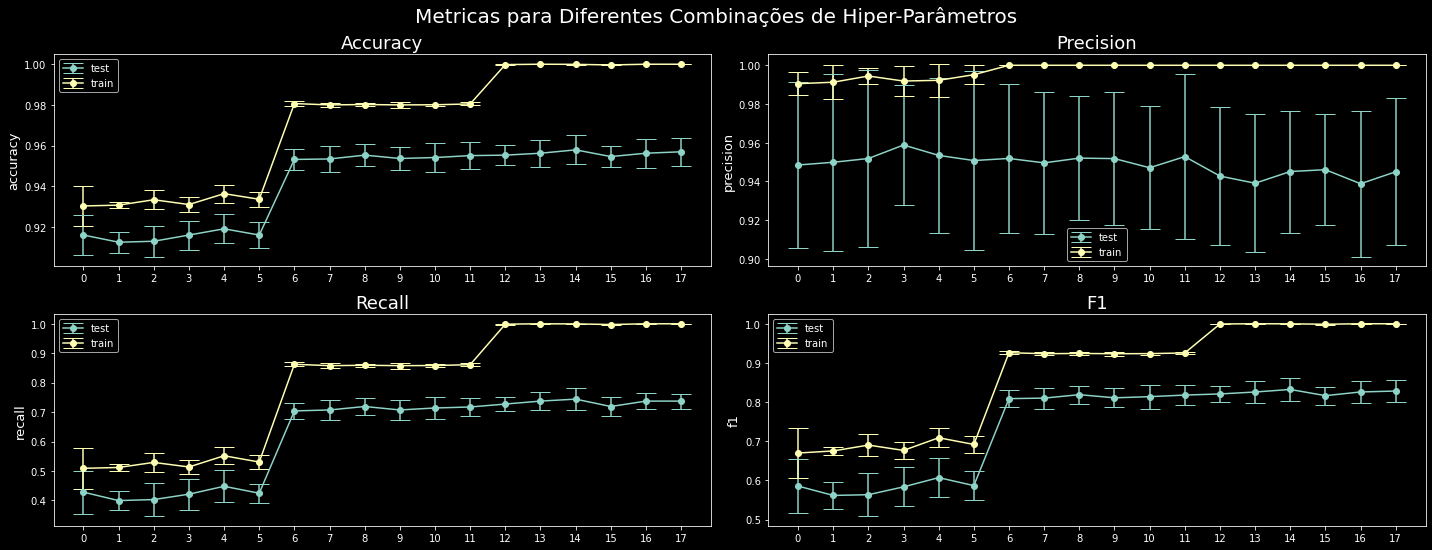

In [139]:
plt.figure(figsize=(20,8))
for i,metric in enumerate(metrics):
    plt.subplot(2,2,i+1)
    plt.errorbar(range(18),search.cv_results_["mean_test_"+metric],yerr=search.cv_results_["std_test_"+metric],marker="o",capsize=10,label="test")
    plt.errorbar(range(18),search.cv_results_["mean_train_"+metric],yerr=search.cv_results_["std_train_"+metric],marker="o",capsize=10,label="train")
    plt.legend()
    plt.ylabel(metric,fontsize=13)
    plt.title(metric.title(),fontsize=18)
    plt.xticks(range(18),labels=[str(i) for i in range(18)]);

plt.suptitle("Metricas para Diferentes Combinações de Hiper-Parâmetros",fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [132]:
search.cv_results_["params"][6]

{'RandomForest__bootstrap': True,
 'RandomForest__max_depth': 10,
 'RandomForest__max_features': 'auto',
 'RandomForest__n_estimators': 50}

## Importância das Variáveis

In [250]:
# Selecionando manualmente o modelo 6, visto que o algoritmo GridSearch seleciona o melhor modelo baseado em f1 e poderia selecionar outro modelo que não o 6. Além disso, o algoritmo retreina o modelo com melhores parâmetros com todos os dados.
params = search.cv_results_["params"][6]
params = {key.split("__")[1]:item for key,item in params.items()}
rf = RandomForestClassifier(**params) # criando modelo
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) # Separando dados
rf.fit(X_train,y_train) # ajustando o modelo

RandomForestClassifier(max_depth=10, n_estimators=50)

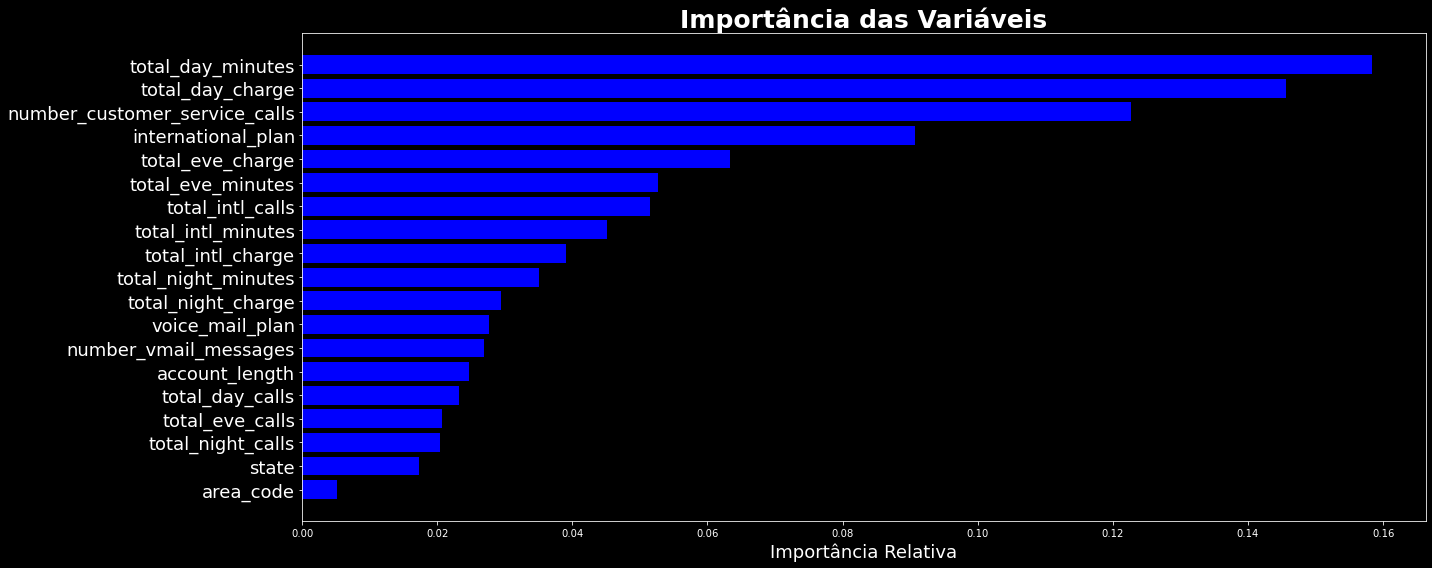

In [247]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,8))
plt.title('Importância das Variáveis',fontsize=25,fontweight="bold")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices],fontsize=18)
plt.xlabel('Importância Relativa',fontsize=18);
plt.tight_layout()

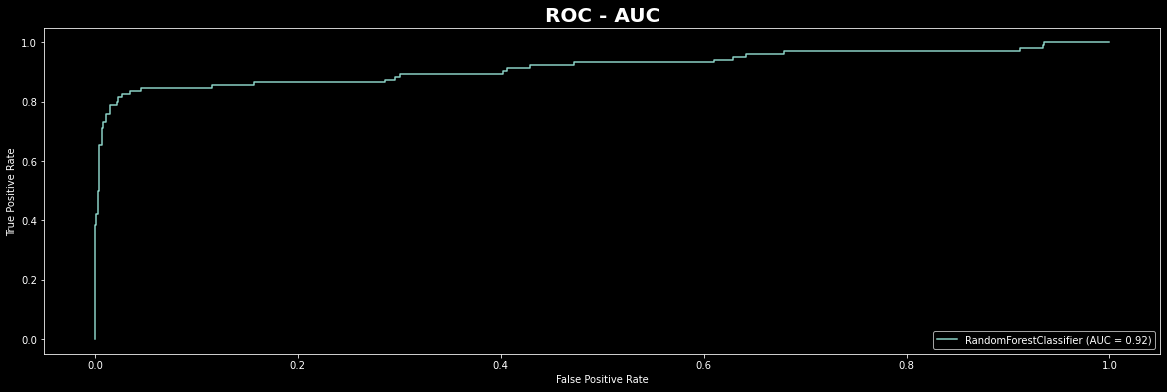

In [251]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
ax.set_title("ROC - AUC",fontsize=20,fontweight="bold")
plot_roc_curve(rf,X_test,y_test,ax=ax) # Representa a capacidade de separação entre Recall e Precisão do nosso modelo. Quanto maior AUC melhor.

# Analise Final

A partir do gráfico que mostra os valores das métricas para diferentes combinações de hiper-parâmetros no modelo nota-se que do modelo número 6 em diante não há melhoria nos resultados do conjunto de teste o que indica que a estrutura presente no modelo 6 é a que possui melhor generaização dos dados mantendo simplicidade e sem super-parametrização. Logo, focando apenas no modelo 6, percebe-se que foi obtido valores de Precisão, Recall e F1-Score de 95%, 72% e 80% respectivamente. Esses resultados mostram-se satisfatórios devido aos indices de precisão e recall, além disso, poder-se-ia realizar mudanças no *Threshold* de predição, a fim de acomodar ainda mais as predições do modelo às necessidades da empresa como mosta a gráfico **ROC-AUC** (por padrão a predição da classe é feita a partir da classe com maior probabilidade). Por fim, o gráfico da **Importância das Variáveis** mostra que os minutos utilizados, o preço cobrado e o número de ligações para assistência ao cliente são as variáveis com maior relevância para nosso modelo (capazes de sozinhas representar 40% da vairância do *Churn*), logo, medidas corretivas e planos de ação deveriam ser propostos com o intuito de reduzir o *Churn* da empresa.